# Predicting Pakistan CO2 Emissions from Solid Fuel Consumption Using Climate Change Indicators.

# Introduction

<p>Pakistan, situated at the forefront of climate change impacts, faces severe environmental challenges. Global warming, exacerbated by human activities, has led to increased carbon dioxide (CO2) emissions, contributing to environmental degradation. CO2, a major greenhouse gas, plays a pivotal role in climate change, trapping heat and intensifying global warming. The burning of fossil fuels, primarily in the form of solid and liquid fuels, significantly contributes to CO2 emissions. Understanding these dynamics is crucial for devising sustainable solutions. This project focuses on predicting Pakistan's CO2 emissions from solid fuel consumption using deep learning approaches, specifically convolutional neural networks (CNN) and recurrent neural networks (RNN).</p>

# Problem Statement

<p>Conventional methods for predicting CO2 emissions lack the granularity required to capture the nuances of Pakistan's climate indicators. The project addresses the inadequacies in existing models by employing deep learning techniques. The challenge lies in developing a robust and accurate predictor that can decipher the intricate patterns and dependencies within the climate change indicators, specifically targeting CO2 emissions arising from fuel consumption in Pakistan.</p>

# Aims and Objectives

1. To design and implement a deep learning-based predictor for Pakistan's CO2 emissions.
1. To enhance predictive accuracy by leveraging CNN for feature extraction from climate change indicators.
1. To incorporate temporal dependencies using RNN to capture sequential patterns in emissions data.
1. To evaluate the predictor's performance against historical climate data, ensuring reliability and generalizability.
1. To contribute insights into the complex interplay between climate change indicators and fuel-based CO2 emissions in Pakistan.

# About The Data

<p>The dataset, sourced from The Humanitarian Data Exchange (HDX), spans from 1960 to 2021, encompassing diverse climate change indicators in Pakistan. With 77 columns initially, the dataset was refined to 25 columns, focusing on data spanning at least 45 years. These indicators include agricultural land percentage, CO2 emissions, renewable energy consumption, and more. The comprehensive dataset serves as a valuable resource for conducting in-depth analyses and training deep learning models to predict CO2 emissions based on fuel consumption in Pakistan.</p>

# Importing necessary libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, LSTM

# Loading Data and Converting into DataFrame.

In [2]:
data = pd.read_csv('Datasets/Pak_Climate_Change_Indicators_By_HDX.csv')

In [3]:
df = pd.DataFrame(data)

In [4]:
df.head()

,Sno,Country Name,Year,CO2 intensity (kg per kg of oil equivalent energy use) Value,CO2 emissions from solid fuel consumption (kt) Value,Cereal yield (kg per hectare) Value,Urban population growth (annual %) Value,Population growth (annual %) Value,"Population, total Value",Urban population Value,...,"Other greenhouse gas emissions, HFC, PFC and SF6 (thousand metric tons of CO2 equivalent) Value",Urban population (% of total population) Value,Agricultural land (sq. km) Value,"Mortality rate, under-5 (per 1,000 live births) Value","Agriculture, forestry, and fishing, value added (% of GDP) Value",CO2 emissions from solid fuel consumption (% of total) Value,Population in urban agglomerations of more than 1 million (% of total population) Value,CO2 emissions from liquid fuel consumption (% of total) Value,Agricultural land (% of land area) Value,RainFall Mean ()
0,1,Pakistan,1960,NaN,5892.869,NaN,NaN,NaN,44988690,9944300,...,NaN,22.104,NaN,252.0,43.189201,41.632124,11.501177,46.295337,NaN,22.968764
1,2,Pakistan,1961,NaN,5804.861,856.4,4.144844,2.364729,46065229,10365137,...,NaN,22.501,357300.0,243.0,41.727426,39.604704,11.799774,46.785089,46.349626,30.017449
2,3,Pakistan,1962,NaN,6189.896,858.0,3.536128,2.431188,47198886,10738219,...,NaN,22.751,358400.0,234.5,40.029233,38.433515,12.057857,46.698543,46.492320,22.300155
3,4,Pakistan,1963,NaN,6681.274,877.7,3.583896,2.486695,48387293,11130045,...,NaN,23.002,358800.0,226.5,38.840015,36.086354,12.315756,48.385819,46.544209,18.846562
4,5,Pakistan,1964,NaN,6523.593,886.5,3.629236,2.531036,49627623,11541400,...,NaN,23.256,363550.0,219.3,38.324054,34.270853,12.575408,47.640146,47.160388,25.169663


# Exploratory Data Analysis (EDA).

In [5]:
df.shape

(62, 25)

In [6]:
df.describe()

,Sno,Year,CO2 intensity (kg per kg of oil equivalent energy use) Value,CO2 emissions from solid fuel consumption (kt) Value,Cereal yield (kg per hectare) Value,Urban population growth (annual %) Value,Population growth (annual %) Value,"Population, total Value",Urban population Value,CO2 emissions from liquid fuel consumption (kt) Value,...,"Other greenhouse gas emissions, HFC, PFC and SF6 (thousand metric tons of CO2 equivalent) Value",Urban population (% of total population) Value,Agricultural land (sq. km) Value,"Mortality rate, under-5 (per 1,000 live births) Value","Agriculture, forestry, and fishing, value added (% of GDP) Value",CO2 emissions from solid fuel consumption (% of total) Value,Population in urban agglomerations of more than 1 million (% of total population) Value,CO2 emissions from liquid fuel consumption (% of total) Value,Agricultural land (% of land area) Value,RainFall Mean ()
count,62.000000,62.000000,44.000000,57.000000,58.000000,61.000000,61.000000,6.200000e+01,6.200000e+01,57.000000,...,47.000000,62.000000,58.000000,61.000000,62.000000,57.000000,62.000000,57.000000,58.000000,57.000000
mean,31.500000,1990.500000,1.451658,8820.807667,1901.355172,3.504194,2.640291,1.179280e+08,3.812156e+07,32724.115000,...,-4873.455676,30.287258,362604.137931,140.677049,27.154193,15.253777,16.630572,47.870408,47.037689,25.690321
std,18.041619,18.041619,0.191260,5801.626119,685.292246,0.587140,0.408392,5.531002e+07,2.245096e+07,22374.705553,...,4021.058214,4.533477,6958.729223,49.949115,5.734083,8.455325,2.267834,4.899061,0.902699,4.867419
min,1.000000,1960.000000,1.082135,2020.517000,840.000000,2.649983,1.931319,4.498869e+07,9.944300e+06,6552.929000,...,-9873.901367,22.104000,352060.000000,65.200000,20.677871,8.064387,11.501177,39.083761,45.669884,15.983080
25%,16.250000,1975.250000,1.348312,4880.777000,1400.850000,2.885904,2.293233,6.732124e+07,1.779160e+07,11441.040000,...,-7702.463560,26.426000,357600.000000,96.300000,23.063969,10.317533,15.468492,44.715080,46.388543,22.548259
50%,31.500000,1990.500000,1.492595,7088.311000,1792.750000,3.629236,2.677773,1.092133e+08,3.353153e+07,27352.153000,...,-5176.686719,30.701000,361535.000000,139.700000,24.694424,12.272650,16.759990,47.171800,46.898999,25.773367
75%,46.750000,2005.750000,1.584537,10087.917000,2424.150000,3.998403,2.901566,1.630930e+08,5.567075e+07,52621.450000,...,-3400.584767,34.133500,367415.000000,176.000000,29.972246,13.983253,18.085671,51.691314,47.661763,30.017449
max,62.000000,2021.000000,1.741677,24682.577000,3180.400000,4.504845,3.363952,2.251999e+08,8.431485e+07,83020.880000,...,10236.183590,37.440000,385090.000000,252.000000,43.189201,41.632124,20.506169,58.517321,49.954597,35.272982


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 25 columns):
 #   Column                                                                                           Non-Null Count  Dtype  
---  ------                                                                                           --------------  -----  
 0   Sno                                                                                              62 non-null     int64  
 1   Country Name                                                                                     62 non-null     object 
 2   Year                                                                                             62 non-null     int64  
 3   CO2 intensity (kg per kg of oil equivalent energy use) Value                                     44 non-null     float64
 4   CO2 emissions from solid fuel consumption (kt) Value                                             57 non-null     float64
 5   Cereal yie

In [8]:
df.columns

Index(['Sno', 'Country Name', 'Year',
       'CO2 intensity (kg per kg of oil equivalent energy use) Value',
       'CO2 emissions from solid fuel consumption (kt) Value',
       'Cereal yield (kg per hectare) Value',
       'Urban population growth (annual %) Value',
       'Population growth (annual %) Value', 'Population, total Value',
       'Urban population Value',
       'CO2 emissions from liquid fuel consumption (kt) Value',
       'Foreign direct investment, net inflows (% of GDP) Value',
       'CO2 emissions from gaseous fuel consumption (% of total) Value',
       'Arable land (% of land area) Value',
       'CO2 emissions from gaseous fuel consumption (kt) Value',
       'Other greenhouse gas emissions, HFC, PFC and SF6 (thousand metric tons of CO2 equivalent) Value',
       'Urban population (% of total population) Value',
       'Agricultural land (sq. km) Value',
       'Mortality rate, under-5 (per 1,000 live births) Value',
       'Agriculture, forestry, and fishing,

In [9]:
df.isnull().sum()

Sno                                                                                                 0
Country Name                                                                                        0
Year                                                                                                0
CO2 intensity (kg per kg of oil equivalent energy use) Value                                       18
CO2 emissions from solid fuel consumption (kt) Value                                                5
Cereal yield (kg per hectare) Value                                                                 4
Urban population growth (annual %) Value                                                            1
Population growth (annual %) Value                                                                  1
Population, total Value                                                                             0
Urban population Value                                                            

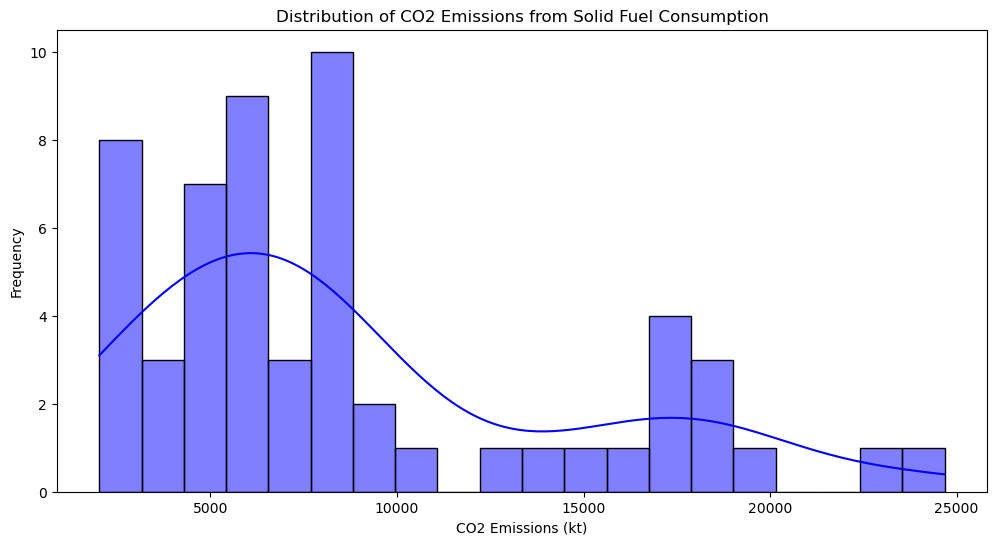

In [10]:
# Histogram - distribution of 'CO2 emissions from solid fuel consumption'.
plt.figure(figsize=(12, 6))
sns.histplot(df['CO2 emissions from solid fuel consumption (kt) Value'], bins=20, kde=True, color='blue')
plt.title('Distribution of CO2 Emissions from Solid Fuel Consumption')
plt.xlabel('CO2 Emissions (kt)')
plt.ylabel('Frequency')
plt.show()

# Data Cleaning and Preprocessing.

In [12]:
# Droping unnecessary columns.
df = df.drop(['Sno', 'Country Name'], axis=1)

In [13]:
# Imputing missing values with mean.
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Splitting Data Into Test-Train Sets.

In [14]:
X = df.drop(['Year', 'CO2 emissions from solid fuel consumption (kt) Value'], axis=1)
y = df['CO2 emissions from solid fuel consumption (kt) Value']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Feature Scaling.

In [16]:
scaler = MinMaxScaler()

In [17]:
X_train = scaler.fit_transform(X_train)

In [18]:
X_test = scaler.transform(X_test)

# Training CNN Model.

In [19]:
model_cnn = Sequential()
model_cnn.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Flatten())

In [20]:
model_cnn.add(Dense(50, activation='relu'))
model_cnn.add(Dense(1))

In [21]:
model_cnn.compile(optimizer='adam', loss='mean_squared_error')

In [22]:
# Reshaping Input Data for CNN.
X_train_cnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_cnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [23]:
model_cnn.fit(X_train_cnn, y_train, epochs=10, batch_size=32, validation_data=(X_test_cnn, y_test))

Epoch 1/50

2/2 [==============================] - 2s 253ms/step - loss: 105548296.0000 - val_loss: 118239104.0000
Epoch 2/50
2/2 [==============================] - 0s 48ms/step - loss: 105545488.0000 - val_loss: 118236384.0000
Epoch 3/50
2/2 [==============================] - 0s 50ms/step - loss: 105543136.0000 - val_loss: 118233744.0000
Epoch 4/50
2/2 [==============================] - 0s 46ms/step - loss: 105540584.0000 - val_loss: 118230904.0000
Epoch 5/50
2/2 [==============================] - 0s 45ms/step - loss: 105537976.0000 - val_loss: 118227808.0000
Epoch 6/50
2/2 [==============================] - 0s 45ms/step - loss: 105535048.0000 - val_loss: 118224392.0000
Epoch 7/50
2/2 [==============================] - 0s 42ms/step - loss: 105532000.0000 - val_loss: 118220600.0000
Epoch 8/50
2/2 [==============================] - 0s 40ms/step - loss: 105528360.0000 - val_loss: 118216360.0000
Epoch 9/50
2/2 [==============================] - 0s 41ms/step - loss: 105524352.0000 - val_lo

# Training RNN (LSTM) model.

In [24]:
model_rnn = Sequential()
model_rnn.add(LSTM(50, activation='relu', input_shape=(X_train_cnn.shape[1], 1)))
model_rnn.add(Dense(1))

In [25]:
model_rnn.compile(optimizer='adam', loss='mean_squared_error')

In [26]:
model_rnn.fit(X_train_cnn, y_train, epochs=50, batch_size=32, validation_data=(X_test_cnn, y_test))

Epoch 1/50
2/2 [==============================] - 2s 321ms/step - loss: 105545824.0000 - val_loss: 118238536.0000
Epoch 2/50
2/2 [==============================] - 0s 53ms/step - loss: 105545280.0000 - val_loss: 118237936.0000
Epoch 3/50
2/2 [==============================] - 0s 50ms/step - loss: 105544728.0000 - val_loss: 118237312.0000
Epoch 4/50
2/2 [==============================] - 0s 51ms/step - loss: 105544120.0000 - val_loss: 118236672.0000
Epoch 5/50
2/2 [==============================] - 0s 48ms/step - loss: 105543520.0000 - val_loss: 118235944.0000
Epoch 6/50
2/2 [==============================] - 0s 49ms/step - loss: 105542824.0000 - val_loss: 118235128.0000
Epoch 7/50
2/2 [==============================] - 0s 51ms/step - loss: 105542072.0000 - val_loss: 118234152.0000
Epoch 8/50
2/2 [==============================] - 0s 50ms/step - loss: 105541128.0000 - val_loss: 118232976.0000
Epoch 9/50
2/2 [==============================] - 0s 45ms/step - loss: 105539984.0000 - val_los

# Evaluating both models.

In [27]:
# Creating evaluater function.
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred = y_pred.reshape((y_pred.shape[0],))
    scores = {
        "R2": r2_score(y_test, y_pred),
        "MAE": mean_absolute_error(y_test, y_pred),
        "MSE": mean_squared_error(y_test, y_pred),
    }
    return scores

In [28]:
# Applying evaluater function on CNN model.
scores_cnn = evaluate_model(model_cnn, X_test_cnn, y_test)
print("CNN Model Scores:")
print(scores_cnn)

1/1 [==============================] - 0s 118ms/step
CNN Model Scores:
{'R2': -4.2653389761814005, 'MAE': 9730.413493746242, 'MSE': 116811702.91371006}


In [29]:
# Applying evaluater function on RNN model.
scores_rnn = evaluate_model(model_rnn, X_test_cnn, y_test)
print("RNN Model Scores:")
print(scores_rnn)

1/1 [==============================] - 0s 221ms/step
RNN Model Scores:
{'R2': 0.6657753077482452, 'MAE': 2383.7880727914667, 'MSE': 7414784.809553182}


# Final Results Visualizations.

1/1 [==============================] - 0s 31ms/step


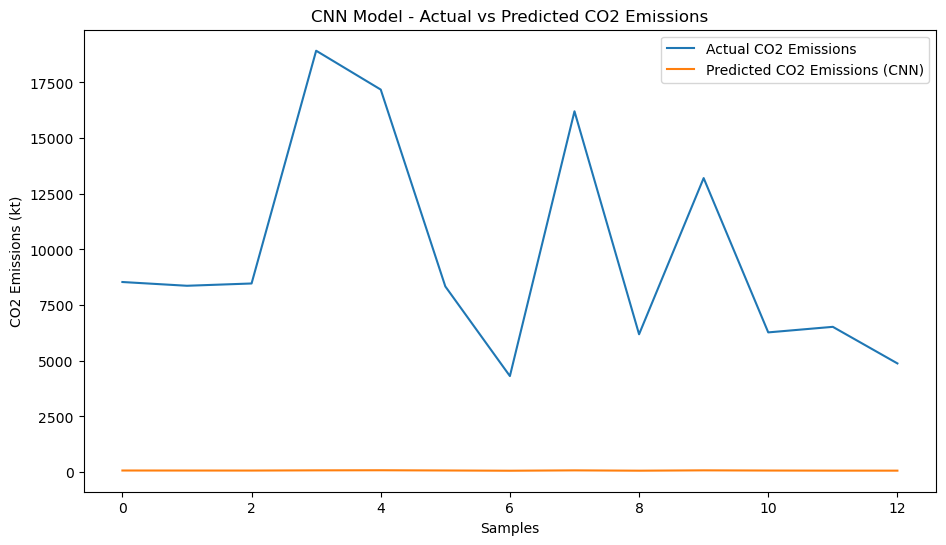

In [30]:
# Visualizing predictions vs actual values for CNN model.
plt.figure(figsize=(11, 6))
plt.plot(y_test.values, label='Actual CO2 Emissions')
plt.plot(model_cnn.predict(X_test_cnn), label='Predicted CO2 Emissions (CNN)')
plt.title('CNN Model - Actual vs Predicted CO2 Emissions')
plt.xlabel('Samples')
plt.ylabel('CO2 Emissions (kt)')
plt.legend()
plt.show()

1/1 [==============================] - 0s 18ms/step


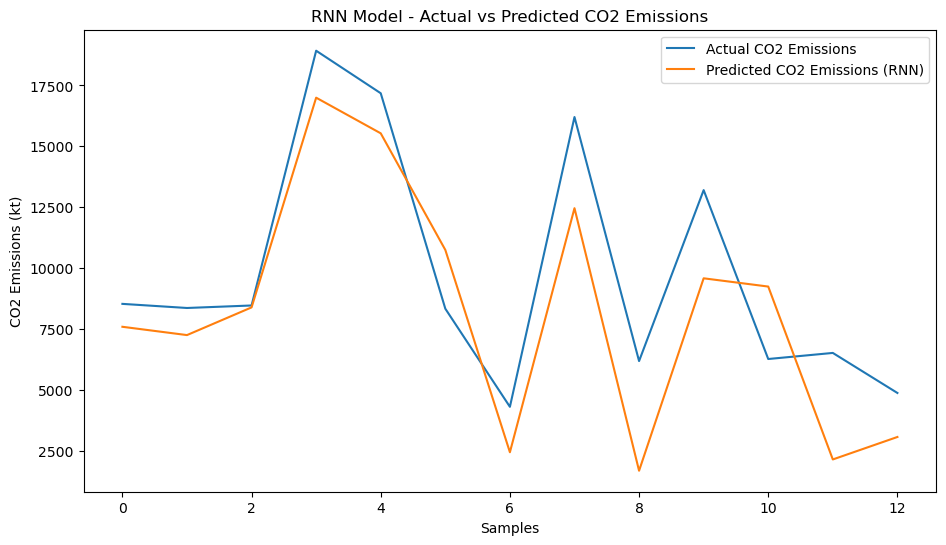

In [31]:
# Visualizing predictions vs actual values for RNN model.
plt.figure(figsize=(11, 6))
plt.plot(y_test.values, label='Actual CO2 Emissions')
plt.plot(model_rnn.predict(X_test_cnn), label='Predicted CO2 Emissions (RNN)')
plt.title('RNN Model - Actual vs Predicted CO2 Emissions')
plt.xlabel('Samples')
plt.ylabel('CO2 Emissions (kt)')
plt.legend()
plt.show()